In [1]:
import pandas as pd 
data = pd.read_csv("../../gen/data-preparation/output/dataset.csv") 

import nltk, re, string, collections
from nltk.util import ngrams
from nltk import word_tokenize

from collections import Counter
from textblob import TextBlob
import seaborn as sns

#imports needed for graphs and stats
import matplotlib.pyplot as plt
from math import sqrt

import numpy as np
from numpy.random import seed
from numpy.random import randn
from numpy import mean

import scipy.stats as stats
from scipy.stats import sem
from scipy.stats import t
from pylab import rcParams


# Analysis towards Rutte's crisis management during COVID-19

## Description of the data

In [3]:
# Looping over the column names (except for id) to get general descriptive data
column_names = list(data.columns.values)
for column_name in column_names:
    if column_name != 'id':
        print (column_name , ':')
        print (data[column_name].describe())
        print ('')
    else:
        continue

created_at :
count                              10766
unique                              3157
top       Tue Apr 21 17:31:45 +0000 2020
freq                                  16
Name: created_at, dtype: object

text :
count                                                 10766
unique                                                 8171
top       RT @dijkshoorn: Krankzinnige eerste vraag van ...
freq                                                    242
Name: text, dtype: object

sentiment :
count          10766
unique          1902
top       (0.0, 0.0)
freq            3351
Name: sentiment, dtype: object

polarity :
count    10766.000000
mean         0.013072
std          0.342870
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.164583
max          1.000000
Name: polarity, dtype: float64

subjectivity :
count    10766.000000
mean         0.470879
std          0.374694
min         -0.300000
25%          0.000000
50%          0.550000
75%          0.800000


## Time Statistics

In [4]:
# Counting the amount of tweets per minute

def CountFrequency(timestamp_list): 
    
    #Create an empty dictionary
    count_timestamps = {} 
    
    #Loop through list of timestamps, count how many times each timestamp occurs
    for item in timestamp_list:
        if (item in count_timestamps): 
            count_timestamps[item] += 1
        else: 
            count_timestamps[item] = 1
    return count_timestamps

In [5]:
# Create a list of 5 minute-intervals in order to set x axis to only show labels at every 5 minute mark
count = 1
xlabel_list = []

for timestamp in CountFrequency(data["time_stamps"]):
    if count % 5 == 1:
        xlabel_list.append(timestamp)
    else:
        xlabel_list.append('')
    count += 1

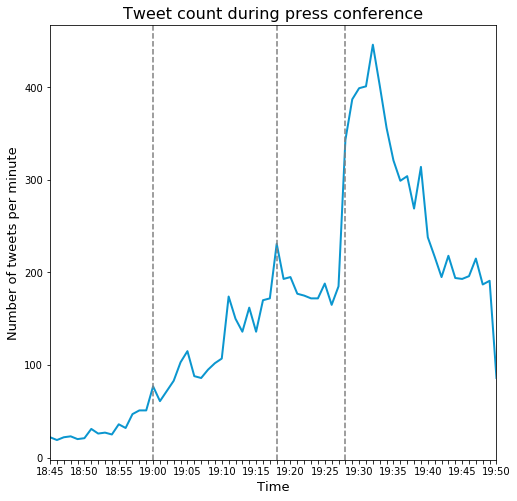

In [19]:
# Turning count of timestamps into line graph

def TimePlot():
    lists = sorted(CountFrequency(data["time_stamps"]).items())

    # Unpack a list of timestamp-frequency pairs into two seperate tuples
    x, y = zip(*lists)

    # Set size, font size, colors, axes
    fig, ax = plt.subplots(figsize=(8, 8))
    plt.plot(x, y, color = '#0b96cf', lw = 2)
    plt.grid(False)
    plt.ylabel('Number of tweets per minute', fontsize=13)
    plt.xlabel('Time', fontsize = 13)
    plt.title('Tweet count during press conference', fontsize = 16)
    
    # Plot important time stamps
    plt.axvline(x=15, color = 'grey', ls = "--") #19:00 Press conference starts, Rutte opens
    plt.axvline(x=33, color = 'grey', ls = "--") #19:18 RIVM director takes over from Rutte
    plt.axvline(x=43, color = 'grey', ls = "--") #19:27 highly controversial question asked by journalist
    
    # Set tick labels and axes
    ax.set_xticklabels(xlabel_list)
    plt.xlim([0, 65])

    # Show plot
    plt.show()

TimePlot()

## Comparing positive versus negative sentiments

In [7]:
# Creating seperate tables with only positive, neutral or negative sentiments
table_positive = data[data['sentiment_category']=='positive']
table_neutral = data[data['sentiment_category']=='neutral']
table_negative = data[data['sentiment_category']=='negative']

In [8]:
# Plot of positive vs neutral vs negative tweets

def TimePlotMultiple(lists_pos, lists_neg, lists_neu):
    # Unpack multiple lists of timestamp-frequency pairs into two seperate tuples
    a,b = zip(*lists_pos)
    c,d = zip(*lists_neg)
    e,f = zip(*lists_neu)

    # Set size, font size, colors, axes
    fig, ax = plt.subplots(figsize=(8, 8))
    
    plt.plot(c,d, label = "Negative tweets", color='#921212', lw = 2)
    plt.plot(a,b, label = "Positive tweets", color = '#309467', lw = 2)
    plt.plot(e,f, label = "Neutral tweets", color = '#0b96cf', lw = 2)

    plt.ylabel('Number of tweets per minute', fontsize=13)
    plt.xlabel('Time', fontsize = 13)
    plt.title('Tweet count during press conference', fontsize = 16)
    plt.grid(False)

    # Plot important time stamps
    plt.axvline(x=15, color = 'grey', ls = "--") #19:00 Press conference starts, Rutte opens
    plt.axvline(x=33, color = 'grey', ls = "--") #19:18 RIVM director takes over from Rutte
    plt.axvline(x=43, color = 'grey', ls = "--") #19:27 highly controversial question asked by journalist

    # Show legend
    plt.rcParams.update({'font.size': 10})
    plt.legend(loc = "upper left")

    # Set tick labels and axes
    ax.set_xticklabels(xlabel_list)
    plt.xlim([0, 65])

    # Show plot
    plt.show()

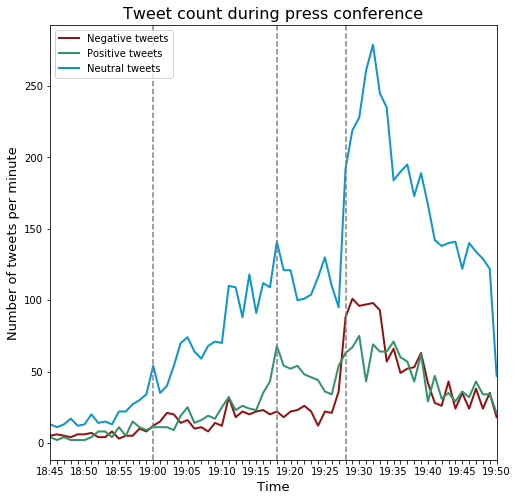

In [9]:
lists_pos = sorted(CountFrequency(table_positive["time_stamps"]).items())
lists_neg = sorted(CountFrequency(table_negative["time_stamps"]).items())
lists_neu = sorted(CountFrequency(table_neutral["time_stamps"]).items())

TimePlotMultiple(lists_pos, lists_neg, lists_neu)

## Sentiment Descriptives

Below are histograms and boxplots that show the distribution of polarity and distribution scores. In the last boxplot, "outliers" are removed to improve readability.

Text(0, 0.5, 'Number of tweets')

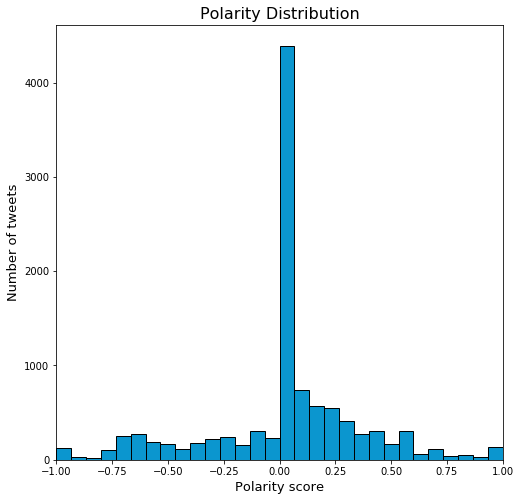

In [10]:
# Plot distribution of polarity scores

# Set size/data
rcParams['figure.figsize'] = 8,8
plt.hist(data['polarity'], color = '#0b96cf', edgecolor = 'black', 
         density=False, bins = int(30))

# Set labels/titles
plt.title('Polarity Distribution', fontsize = 16)
plt.xlabel("Polarity score",fontsize=13)
plt.xlim([-1, 1])
plt.ylabel("Number of tweets",fontsize=13)

Text(0, 0.5, 'Number of tweets')

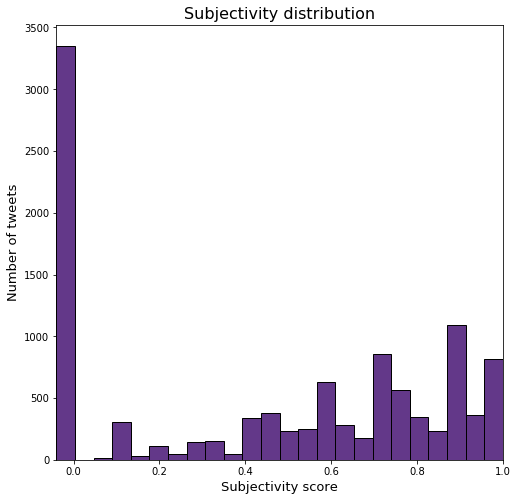

In [11]:
# Plot distribution of subjectivity scores

# Set size/data
rcParams['figure.figsize'] = 8,8
plt.hist(data['subjectivity'], color = '#633889', edgecolor = 'black', density=False,
         bins = int(30))

# Set labels/titles
plt.title('Subjectivity distribution', fontsize = 16)
plt.xlabel("Subjectivity score",fontsize=13)
plt.xlim([-0.04, 1])
plt.ylabel("Number of tweets",fontsize=13)

Text(0, 0.5, 'Range')

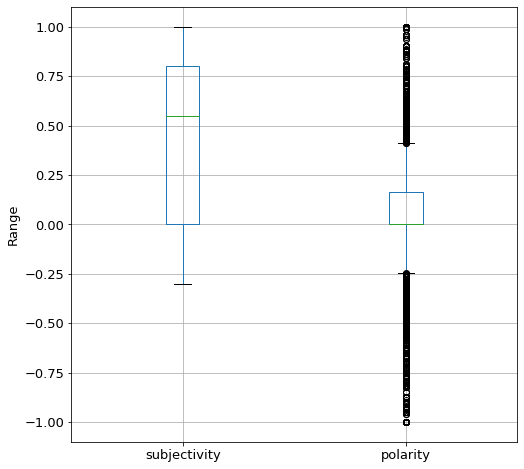

In [12]:
boxplot = data.boxplot(column=['subjectivity','polarity'],
                     fontsize = 13,grid = True, vert=True,figsize=(8,8))
plt.ylabel('Range', fontsize = 13)

Text(0, 0.5, 'Range')

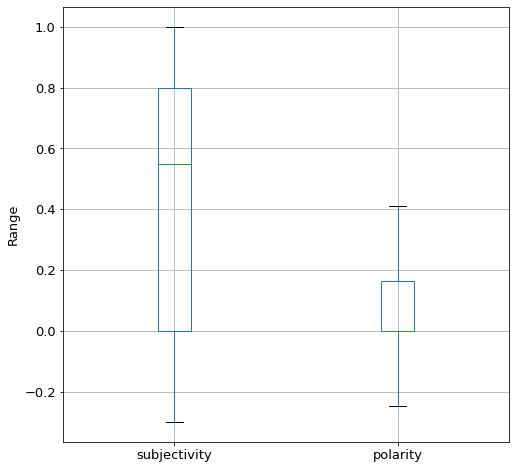

In [13]:
boxplot = data.boxplot(column=['subjectivity','polarity'], 
                     fontsize = 13,grid = True, vert=True,figsize=(8,8),showfliers = False)
plt.ylabel('Range', fontsize = 13)

## Frequent words

For the following analysis, only the tweets that are not retweeted have been analyzed, as some highly retweeted tweets may skew the our results. Thereafter, the most frequent words, as wel as most frequent bigrams and sixgrams are found. We have removed stopwords for the single frequent word, but have left them in for the bigram and sixgram as we think here they are important for sentence structure, and a lot of information would be lost if we would remove stop words from highly quoted sentences.

In [14]:
# Create a new column that only includes text when it has not been retweeted, returns empty otherwise.
text_list_no_rt = []
RT_counter = 0
for i, line in data.iterrows():
    text_rt_check = (line["text"][0:4])
    if text_rt_check == 'RT @':           # If it starts with RT @, then the tweet is a retweet
        data.loc[i,"No_RT_text"] = ''     # and must therefore not be included in the new column
        RT_counter +=1
    else:
        data.loc[i,"No_RT_text"] = (line["text"])   #Otherwise, tweet can be included 

# Calculate how many tweets are left for frequent word analysis
index = data.index
number_of_rows = len(index)     
tweets_left = number_of_rows - RT_counter

# Print RT count
print ("The number of retweets in the dataset is: " + str(RT_counter)
       + ". Hence, the frequency counts are based on a total of " +
       str(tweets_left) + " tweets")

The number of retweets in the dataset is: 3713. Hence, the frequency counts are based on a total of 7053 tweets


In [49]:
# Create a list of all words of the original tweets
words = (data["No_RT_text"].str.lower().str.cat(sep=' ').split())

# Remove stop words
stopwords = nltk.corpus.stopwords.words('dutch')  
new_words = []
for word in words:
    if word in stopwords:
        continue
    else:
        new_words.append(word)

# Count how many times each word occurs
word_counter = Counter(new_words)

# Sort by frequency
popular_words = sorted(word_counter, key = word_counter.get, reverse = True)

# Generate dataframe out of Counter
result_single = pd.DataFrame(Counter(new_words).most_common(10),
                    columns=['Word', 'Frequency']).set_index('Word')

result_single

,Frequency
Word,
#persconferentie,4227
vragen,626
we,601
rutte,494
weer,482
#coronamaatregelen,470
wel,455
vraag,449
@minpres,383


In [47]:
# Function to extract n-grams 
def extract_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]

In [48]:
# Bigram
bigrams_list = []
for i, line in data.iterrows():
    text = (line["No_RT_text"])
    text = text.lower()
    text = text.replace(':',' ').replace('#',' ').replace('@',"").replace('!',"").replace('?',"").replace('.',"").replace('http',"").replace(',',"").replace("'","")
    token = nltk.word_tokenize(text)
    bigrams = extract_ngrams(text, 2)
    bigrams_list.append(bigrams)

# Flatten bigram list
bigrams_list_flat = []
for x in bigrams_list:
    for y in x:
        bigrams_list_flat.append(y)

# Count how many times each bigram occurs    
bigrams_counter = Counter(bigrams_list_flat)

# Generate dataframe out of Counter
result_bigram = pd.DataFrame((bigrams_counter).most_common(10), columns=['Word', 'Frequency']).set_index('Word')

result_bigram

,Frequency
Word,
van de,745
wat een,474
de persconferentie,391
persconferentie coronamaatregelen,323
persconferentie s,301
in de,228
de nos,215
eerste vraag,202
voor de,186


In [50]:
# Sixgram
sixgrams_list = []
for i, line in data.iterrows():
    text = (line["No_RT_text"])
    text = text.lower()
    text = text.replace('rt @', '').replace(':',' ').replace('#',' ').replace('@',"").replace('!',"").replace('?',"").replace('.',"").replace('http',"").replace(',',"")
    token = nltk.word_tokenize(text)
    sixgrams = extract_ngrams(text, 6)
    sixgrams_list.append(sixgrams)

# Flatten sixgram list
sixgrams_list_flat = []
for x in sixgrams_list:
    for y in x:
        sixgrams_list_flat.append(y)

# Count how many times each sixgram occurs   
sixgram_counter = Counter(sixgrams_list_flat)

# Generate dataframe out of Counter
result_sixgram = pd.DataFrame((sixgram_counter).most_common(10), columns=['Word', 'Frequency']).set_index('Word')

result_sixgram

,Frequency
Word,
niet ten koste gaan van de,71
mag niet ten koste gaan van,68
ten koste gaan van de gezondheid,67
koste gaan van de gezondheid van,66
gaan van de gezondheid van de,49
van de gezondheid van de ander,44
vrijheid van de een mag niet,43
de een mag niet ten koste,43
van de een mag niet ten,42


## Comparison of sentiments towards Rutte, RIVM and press conference in general

Below, the sentiment categories for three groups are compared. These groups are:
- Tweets addressed about/ addressed to Mark Rutte (i.e. tweets that include '@MinPres')
- Tweets about the RIVM and/or van Dissel (i.e. tweets that include 'RIVM' and/or 'Dissel')
- Tweets about the press conference in general (i.e. tweets that include '#persconferentie')

Please note the sentiment categories and their thresholds:
- Positive: a polarity score of more than 0.2
- Negative: a polarity score of lower than -0.2
- Neutral: a score from -0.2 up to and including 0.2

### Description of data

In [51]:
# Create table that include only texts with "@MinPres"
table_rutte = data[data['text'].str.contains('@MinPres')]

# Create table that include only texts with "#persconferentie"
table_pc = data[data['text'].str.contains('#persconferentie')]

# Create tables that include only texts with either both "RIVM" or "Dissel"
table_rivm_1 = data[data['text'].str.contains('Dissel')]
table_rivm_2 = data[data['text'].str.contains('RIVM')]
rivm_lists = [table_rivm_1,table_rivm_2]
table_rivm = pd.concat(rivm_lists)

In [52]:
# Extract the polarity and subjectivity scores for both tables
rutte_polarity = table_rutte["polarity"]
rutte_subjectivity = table_rutte["subjectivity"]

pc_polarity = table_pc["polarity"]
pc_subjectivity = table_pc["subjectivity"]

rivm_polarity = table_rivm["polarity"]
rivm_subjectivity = table_rivm["subjectivity"]

In [53]:
# Print polarity and subjectivity scores
print("mean polarity score Rutte is: ", rutte_polarity.mean())
print("mean polarity score RIVM is: ", rivm_polarity.mean())
print("mean polarity score press conference is: ", pc_polarity.mean())

mean polarity score Rutte is:  0.08288527468914822
mean polarity score RIVM is:  0.04840123963709982
mean polarity score press conference is:  0.0009146205567227543


In [54]:
# Function to count all the absolute numbers of tweets in each sentiment category (positive, negative or neutral) 
def Sentiment_Count(table):
    
    # Group per table per sentiment category
    grouped_table = table.groupby('sentiment_category')
    
    table_cat_counts = grouped_table.size().reset_index(name='counts')
    table_cat_list = table_cat_counts['counts'].tolist()
    return (table_cat_list)

In [55]:
# Function to count all the percentages of tweets that's in either sentiment category.
def Sentiment_Percentage(table):
    table_cat_list = Sentiment_Count(table)
    
    # Sum total count of tweets
    total = 0 
    for line in table_cat_list:
        total += line
    
    # Create percentage for each category
    percentage_list = []
    for line in table_cat_list:
        percentage = line / total * 100
        percentage_list.append(percentage)
    
    return (percentage_list)

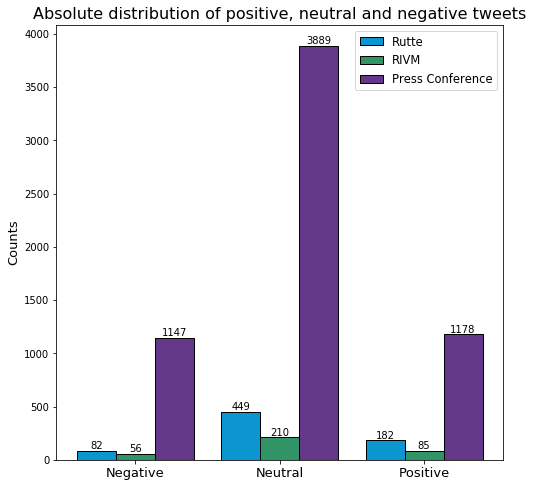

In [62]:
# Plot bar charts with absolute numbers
N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure(figsize = (8,8), edgecolor = "black")
ax = fig.add_subplot(111)
plt.title('Absolute distribution of positive, neutral and negative tweets', fontsize = 16)

# Plot bars and values
yvals = Sentiment_Count(table_rutte)
rects1 = ax.bar(ind, yvals, width, color='#0b96cf',edgecolor = 'black')
zvals = Sentiment_Count(table_rivm)
rects2 = ax.bar(ind+width, zvals, width, color='#309467',edgecolor = 'black')
kvals = Sentiment_Count(table_pc)
rects3 = ax.bar(ind+width*2, kvals, width, color='#633889',edgecolor = 'black')

# Set axis labels and tick marks
ax.set_ylabel('Counts', fontsize=13)
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Negative', 'Neutral', 'Positive'), fontsize =13 )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Rutte', 'RIVM', 'Press Conference'), fontsize=11.5  )

# Set bar labels
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1*h, '%d'%int(h),
                ha='center', va='bottom')       
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Show plot
plt.show()

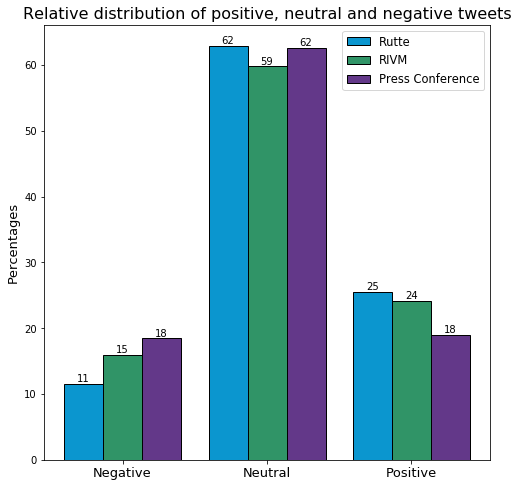

In [61]:
# Plot bar charts with percentages
N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure(figsize = (8,8), edgecolor = "black")
ax = fig.add_subplot(111)
plt.title('Relative distribution of positive, neutral and negative tweets', fontsize = 16)

# Plot bars and values
yvals = Sentiment_Percentage(table_rutte)
rects1 = ax.bar(ind, yvals, width, color='#0b96cf',edgecolor = 'black')
zvals = Sentiment_Percentage(table_rivm)
rects2 = ax.bar(ind+width, zvals, width, color='#309467',edgecolor = 'black')
kvals = Sentiment_Percentage(table_pc)
rects3 = ax.bar(ind+width*2, kvals, width, color='#633889',edgecolor = 'black')

# Set axis labels and tick marks
ax.set_ylabel('Percentages',fontsize=13)
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Negative', 'Neutral', 'Positive'), fontsize = 13 )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Rutte', 'RIVM', 'Press Conference'), fontsize=11.5 )

# Set bar labels
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1*h, '%d'%int(h),
                ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Show plot
plt.show()

### T-tests to assess differences

From the data above, it seems that people are more positive towards Mark Rutte, and a lot more negative towards the press conference in general. To confirm, we have run an ANOVA, followed by several t-tests to see where the significant difference comes from. Before doing so, the normality was checked. Although all graphs seem to be very high in the middle, we have decided to go through with the ANOVA.

#### Difference in polarity

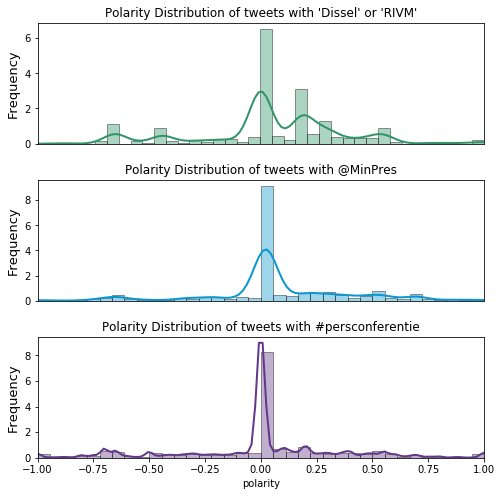

In [89]:
from matplotlib import pyplot

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 8), sharex=True)

# Histogram for polarity scores with @MinPres
pyplot.subplot(312)
plt.xticks([], [])
plt.xlabel("")
sns.distplot(table_rutte['polarity'], hist=True, kde=True, 
             bins=int(180/5), color = '#0b96cf', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Polarity Distribution of tweets with @MinPres')
plt.ylabel("Frequency",fontsize=13)
plt.xlim([-1, 1])
plt.xlabel("")

# Histogram for polarity scores with 'RIVM' or 'Dissel'
pyplot.subplot(311)
plt.xticks([], [])
sns.distplot(table_rivm['polarity'], hist=True, kde=True, 
             bins=int(180/5), color = '#309467', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Polarity Distribution of tweets with \'Dissel\' or \'RIVM\'')
plt.xlim([-1, 1])
plt.xlabel("")
plt.ylabel("Frequency",fontsize=13)

# Histogram for polarity scores with #persconferentie
pyplot.subplot(313)
sns.distplot(table_pc['polarity'], hist=True, kde=True, 
             bins=int(180/5), color = '#633889', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Polarity Distribution of tweets with #persconferentie')
plt.ylabel("Frequency",fontsize=13)
plt.xlim([-1, 1])


fig.subplots_adjust(hspace=0.3)
plt.show()

### Statistical tests

In [90]:
# ANOVA
stats.f_oneway(table_rutte['polarity'],table_pc['polarity'],table_rivm['polarity']) 

F_onewayResult(statistic=18.56961415394565, pvalue=9.033052694657213e-09)

In [91]:
import scipy
scipy.stats.ttest_ind(table_rutte['polarity'], 
                      table_pc['polarity'], axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=5.736228041808758, pvalue=1.008906138090924e-08)

In [92]:
import scipy
scipy.stats.ttest_ind(table_rutte['polarity'], 
                      table_rivm['polarity'], axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=1.6468749039723918, pvalue=0.09987960555932282)

In [93]:
import scipy
scipy.stats.ttest_ind(table_pc['polarity'], 
                      table_rivm['polarity'], axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=-2.3783132198937267, pvalue=0.01742049917461227)